# Ex 9: Regression Algorithms

In [29]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

never = False

In [30]:
import seaborn as sns
sns.set()

import plotly.express as px

## 9.1 Create the input data

In [31]:
def true_func(X):
    return np.cos(1.5 * np.pi * X)

In [32]:
def sampled_func(X):
    val = true_func(X)
    val = val+(0.5*np.random.rand(X.shape[0], 1)-0.25)
    return val

In [33]:
np.random.seed(0)

n_samples = 400
X = np.sort(4*np.random.rand(n_samples), axis=0)
X = X.reshape(n_samples, 1)
y_true = true_func(X)
y_sampled = sampled_func(X).ravel()

### Shuffle the data in order to make the training set contain values from the complete definition range
The process of splitting the dataset into test and training set must ensure, that the test set is containing elements from the complete value range of observations. Hence, a simple percentage split of the (sorted) observations is not sufficient. Instead, data must be shuffled first

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y_sampled, test_size=0.20, random_state=42)

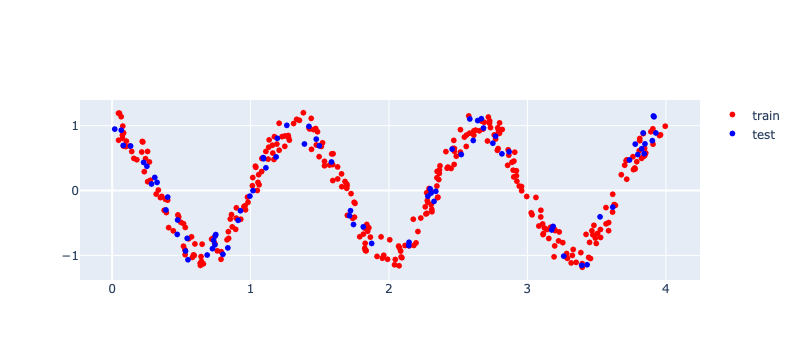

In [35]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_traces(go.Scatter(x=X_train.ravel(), y=y_train,
                          mode = 'markers',
                          marker = {'color' : 'red'},
                          name = "train"
                         ))
fig.add_traces(go.Scatter(x=X_test.ravel(), y=y_test,
                          mode = 'markers',
                          marker = {'color' : 'blue'},
                          name = "test"
                         ))
fig.show()

## 9.3 Train a regression tree with a depth of your choice and check the prediction performance

In [64]:
depth = 5
dtree = DecisionTreeRegressor(max_depth=depth)

In [65]:
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [66]:
cv_results = cross_validate(dtree, X_train, y_train, cv=3, n_jobs=-1, scoring = "neg_mean_squared_error", return_train_score=True, return_estimator=True)

In [67]:
cv_results

{'fit_time': array([0.000278  , 0.00143886, 0.00048804]),
 'score_time': array([0.00013709, 0.00258303, 0.00029087]),
 'estimator': [DecisionTreeRegressor(max_depth=5),
  DecisionTreeRegressor(max_depth=5),
  DecisionTreeRegressor(max_depth=5)],
 'test_score': array([-0.15123569, -0.17515613, -0.18272035]),
 'train_score': array([-0.16391052, -0.13426561, -0.1430472 ])}

In [68]:
best_clf = cv_results["estimator"][cv_results["test_score"].argmax()]

In [69]:
cv_results["test_score"].argmax()

0

## 9.4 Predict the test data and measure the performance

In [70]:
y_pred = best_clf.predict(X_test)

In [71]:
y_mse_tree = mean_squared_error(y_test, y_pred)
y_mae_tree = mean_absolute_error(y_test, y_pred)

In [72]:
print(f"mse = {y_mse_tree}\nmae = {y_mae_tree}")

mse = 0.23543489849918164
mae = 0.34582029094227906


we need to sort X_test, y_test and y_pred coordinates again to draw proper lines in the visualization

In [73]:
idx = np.argsort(X_test, axis=0)
X_test = np.sort(X_test, axis=0)
y_pred = [y_pred[i][0] for i in idx]
y_test = [y_test[i][0] for i in idx]

TypeError: only integer scalar arrays can be converted to a scalar index

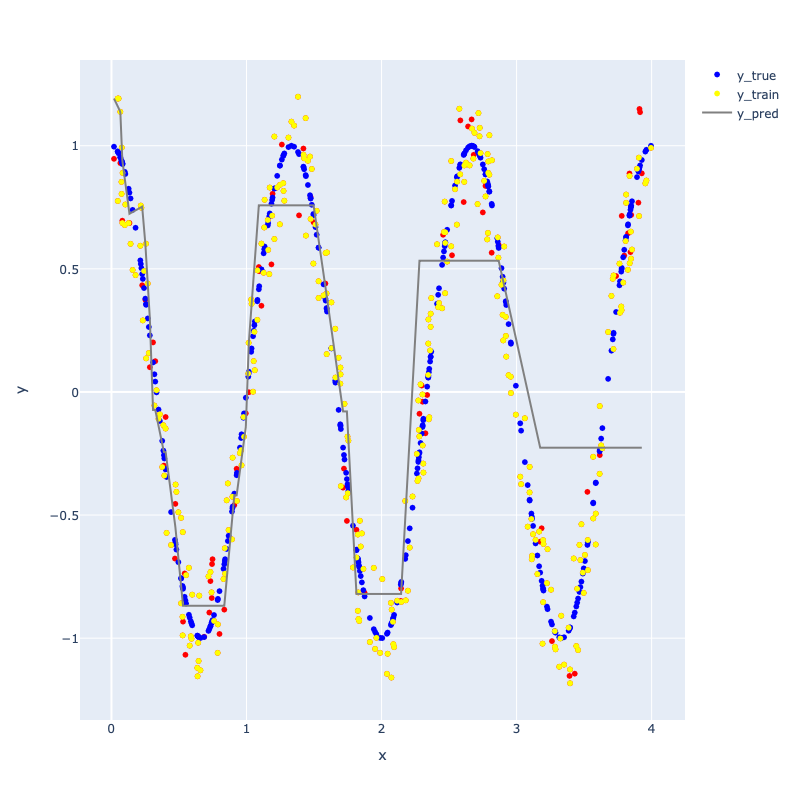

In [74]:
import plotly.graph_objects as go

fig = px.scatter(x=X.ravel(), y=y_sampled.ravel(), color_discrete_sequence=['red'], height = 800)
fig.add_trace(
    go.Scatter(
        x=X.ravel(), 
        y=y_true.ravel(), 
        name = "y_true",
        mode="markers",
        marker=dict(color="blue"))
)
fig.add_trace(
    go.Scatter(
        x=X_train.ravel(), 
        y=y_train.ravel(), 
        name = "y_train",
        mode="markers",
        marker=dict(color="yellow"))
)
fig.add_trace(
    go.Scatter(
        x=X_test.ravel(),
        y=y_pred,
        name = "y_pred",
        mode="lines",
        line=go.scatter.Line(color="gray"),
        showlegend=True)
)

fig.show()

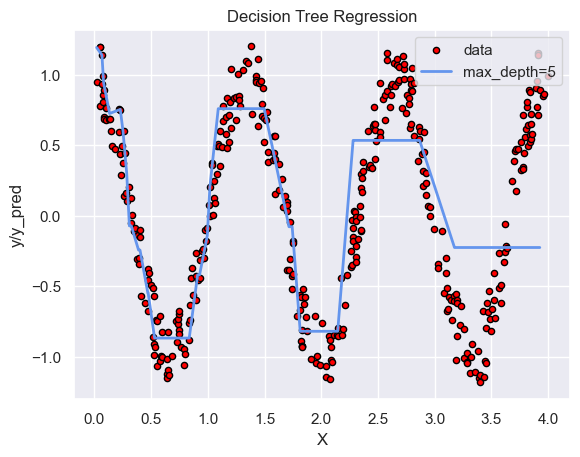

In [75]:
# Plot the results
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X, y_sampled, s=20, edgecolor="black", c="red", label="data")
plt.plot(X_test, y_pred, color="cornflowerblue", label=f"max_depth={depth}", linewidth=2)
#plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("X")
plt.ylabel("y/y_pred")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

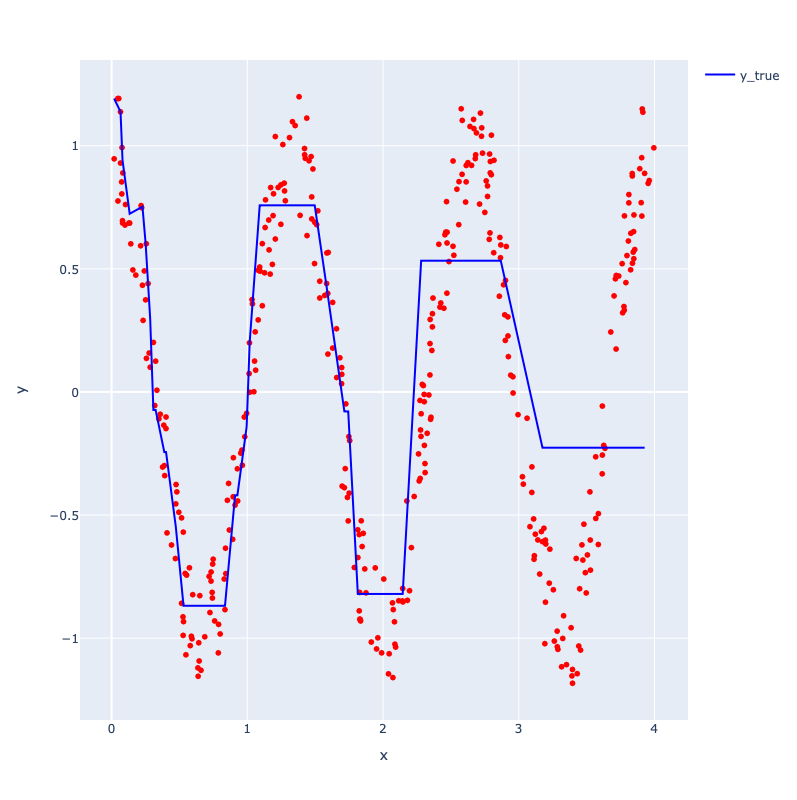

In [80]:
fig = px.scatter(x=X.ravel(), y=y_sampled.ravel(), color_discrete_sequence=['red'], height = 800)
fig.add_trace(
    go.Scatter(
        x=X_test.ravel(), 
        y=y_pred, 
        name = "y_true",
        mode="lines",
        marker=dict(color="blue"))
)

fig.show()

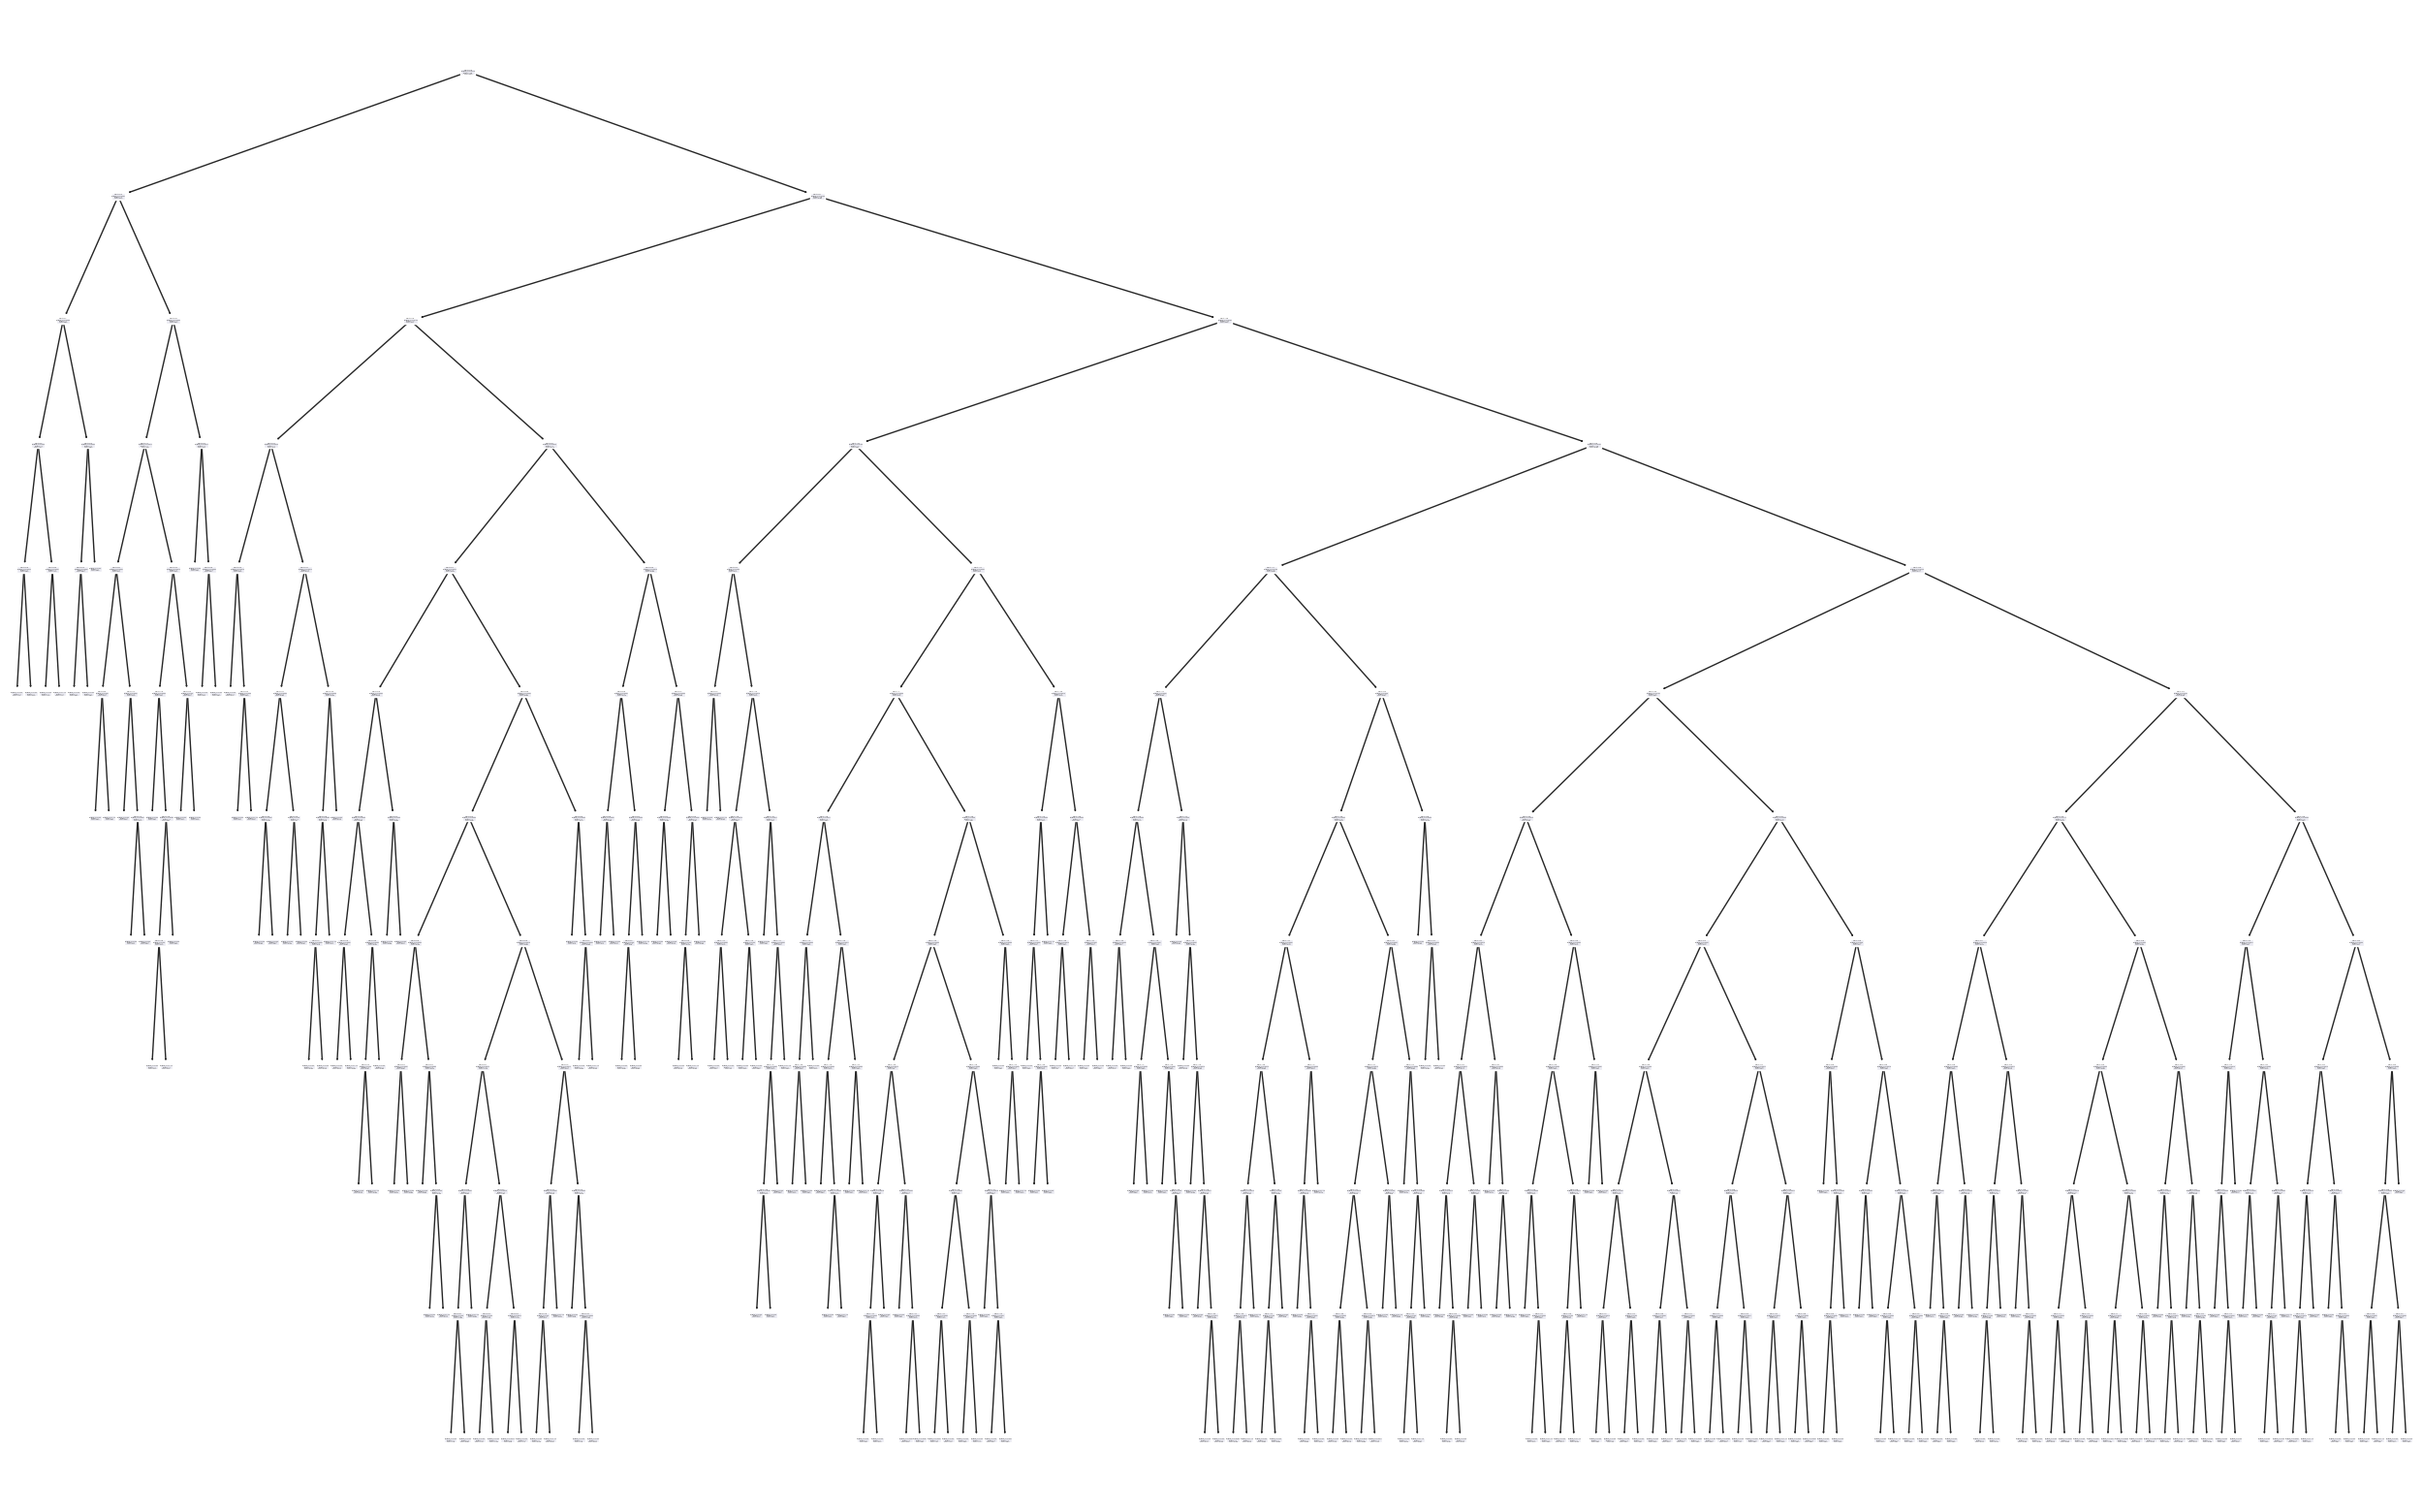

In [48]:
plt.figure(figsize =(32, 20))
res = tree.plot_tree(dtree)

In [49]:
import dtreeviz as dtv

In [50]:
v = dtv.model(dtree, X_train, y_train,
                target_name="target"
                )

In [51]:
v.view(scale=1.2)

## 9.5 Train a linear regressor, predict and measure the performance

In [52]:
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [53]:
y_mse_lin = mean_squared_error(y_test, y_pred)
y_rmse_lin = np.sqrt(y_mse_lin)
y_mae_lin = mean_absolute_error(y_test, y_pred)

In [54]:
print(f"mse = {y_mse_lin}\nrmse = {y_rmse_lin}\nmae = {y_mae_lin}")

mse = 0.5036754173374979
rmse = 0.7097009351392303
mae = 0.6365093687013532


In [55]:
regr.coef_

array([-0.01002121])

In [56]:
regr.intercept_

0.03522415262535872

## 9.6 Train a polynomial regressor, predict and measure performance

In [57]:
regrPoly = make_pipeline(PolynomialFeatures(11), LinearRegression())
regrPoly.fit(X_train, y_train)
y_pred_poly = regrPoly.predict(X_test)

In [58]:
y_mse_poly = mean_squared_error(y_test, y_pred_poly)
y_mae_poly = mean_absolute_error(y_test, y_pred_poly)

In [59]:
print(f"mse = {y_mse_poly}\nmae = {y_mae_poly}")

mse = 0.025935530053892708
mae = 0.12654463126486037


In [60]:
#from sklearn.linear_model import Ridge
#from sklearn.preprocessing import SplineTransformer

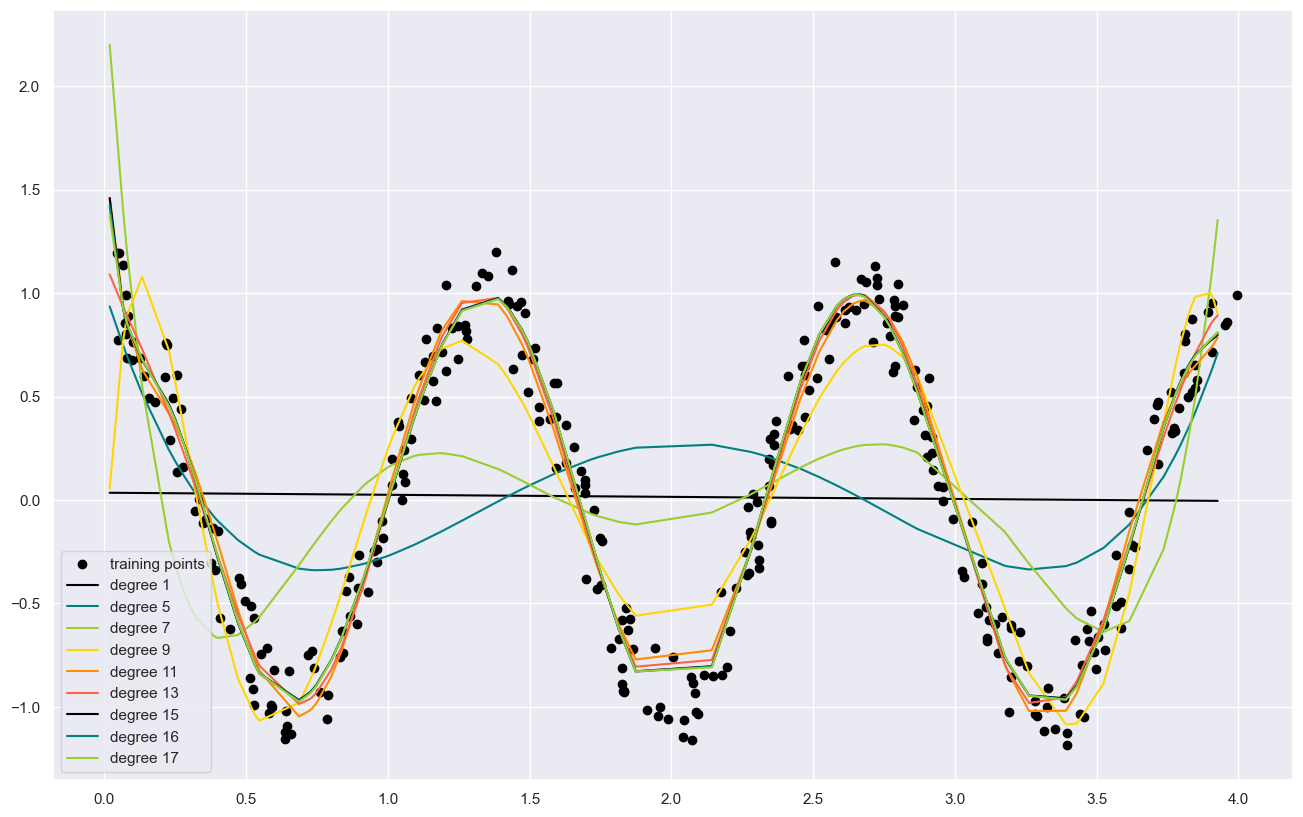

In [61]:
# plot function
fig, ax = plt.subplots(figsize=(16,10))
ax.set_prop_cycle(
    color=["black", "teal", "yellowgreen", "gold", "darkorange", "tomato"]
)

# plot training points
ax.scatter(X_train, y_train, label="training points")

mse_poly_train = []
mse_poly_test = []
# polynomial features
#for degree in [15]:
for degree in [1, 5, 7, 9, 11, 13, 15, 16, 17]:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    y_plot = model.predict(X_test)
    mse_poly_train.append(mean_squared_error(y_train, model.predict(X_train)))
    mse_poly_test.append(mean_squared_error(y_test, model.predict(X_test)))
    ax.plot(X_test, y_plot, label=f"degree {degree}")
ax.legend(loc="lower left")
plt.show()

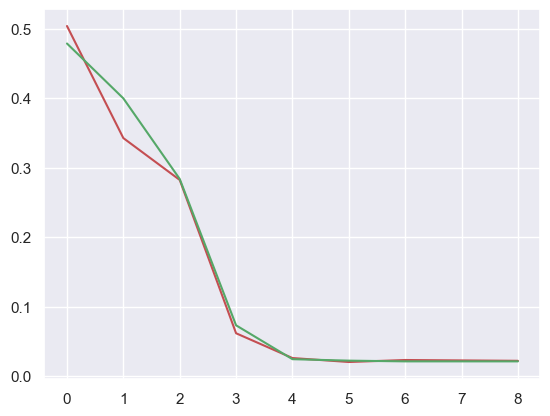

In [62]:
plt.plot(mse_poly_test, color="r")
plt.plot(mse_poly_train, color="g")

In [63]:
model.predict(np.array([5]).reshape(-1, 1))

array([-12369.54326491])

### Get the polynomial equation parameters

In [129]:
model.named_steps['linearregression'].coef_

array([ 0.00000000e+00, -1.86479693e+01,  1.46262004e+02, -6.29416130e+02,
        1.40658298e+03, -1.72382358e+03,  9.92810235e+02,  2.50689452e+02,
       -9.64383799e+02,  8.58047131e+02, -4.29176958e+02,  1.28957656e+02,
       -1.98144045e+01, -4.92462678e-01,  8.84808612e-01, -1.79010314e-01,
        1.66849936e-02, -6.29178976e-04])

In [130]:
model.named_steps['linearregression'].intercept_

1.6804363117659717

In [131]:
from IPython.display import display, Math

displaystring = r"y = "
for i in range(1, len(model.named_steps['linearregression'].coef_)):
    if i < len(model.named_steps['linearregression'].coef_)-1:
        if (model.named_steps['linearregression'].coef_[i+1] > 0):
            postfix = " + "
        else:
            postfix = " "
    displaystring += "{:4.4f}x^{{ {} }}".format(model.named_steps['linearregression'].coef_[i], i) + postfix
if (model.named_steps['linearregression'].intercept_ > 0):
    displaystring += " + "
displaystring += "{:4.4f}".format(model.named_steps['linearregression'].intercept_)
display(Math(displaystring))

<IPython.core.display.Math object>

In [87]:
from IPython.display import display, Math
a=1
b=2
P = 3
V = 4
display(Math(r'Dims: {}x{}m \\ Area: {}m^2 \\ Volume: {}m^3'.format(a, round(b,2), P, V)))

<IPython.core.display.Math object>

## 9.7 Perform a gaussian regression

In [132]:
class GaussianFeatures(BaseEstimator, TransformerMixin):
    """
    Transforms a given interval from the one-dimensional input space X
    into a uniformly spaced Gaussian features distribution.
    The X must be an np.array-like in rows first shape X.shape(n_samples, 1)
    see: https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.06-Linear-Regression.ipynb
         for more details on kernel definition (code was partially taken from there)
    """
    
    def __init__(self, N, width_factor=2.0):
        if (N<2):
            raise ValueError("Number of Gaussian Kernels must be at least 2")
        self.N = N # N is the number of kernels
        self.width_factor = width_factor # the width of the kernel
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        # effectively computes 1/2*exp(SUM_i(x_i-center)^2/width^2) 
        # where x_i is a feature in a sample vector x
        # hence the gaussian kernel is placed at center position y in 
        # every dimension having identical std_dev in every dimension
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        print(self.centers_)
        # scale std deviation of gaussian kernels according to distance between kernels
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        # transforms the 2D festure matrix into a 3D matrix
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
        

In [133]:
regrRBF = make_pipeline(GaussianFeatures(7), LinearRegression())

In [134]:
regrRBF.fit(X_train, y_train)
y_pred_RBF = regrRBF.predict(X_test)

[0.04570983 0.70398953 1.36226923 2.02054893 2.67882863 3.33710833
 3.99538803]


In [135]:
mean_squared_error(y_test, y_pred_RBF)

1.0756111370721715

In [136]:
mse_poly_test

[0.49955647097534717,
 0.6683589646742776,
 0.7904545148308616,
 1.0248599673197094,
 1.1140664183128677,
 1.1065985311170166,
 1.1182843497735193,
 1.1156789154881674,
 1.1134196516271764]

## 9.8 Perform Kernel Ridge Regression with Hyperparameter Optimization

In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge

In [138]:
krr = GridSearchCV(
    KernelRidge(),
    param_grid={"kernel":["rbf", "polynomial"], "degree":[7, 9, 11, 15], "alpha": [1e0, 0.1, 1e-2, 1e-3], "gamma": np.logspace(-2, 2, 5)},
    cv =3,
    verbose = 2)

krr.fit(X_train, y_train)

y_pred_krr = krr.best_estimator_.predict(X_test)

Fitting 3 folds for each of 160 candidates, totalling 480 fits
[CV] END ........alpha=1.0, degree=7, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........alpha=1.0, degree=7, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ........alpha=1.0, degree=7, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END .alpha=1.0, degree=7, gamma=0.01, kernel=polynomial; total time=   0.3s
[CV] END .alpha=1.0, degree=7, gamma=0.01, kernel=polynomial; total time=   0.3s
[CV] END .alpha=1.0, degree=7, gamma=0.01, kernel=polynomial; total time=   0.3s
[CV] END .........alpha=1.0, degree=7, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .........alpha=1.0, degree=7, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .........alpha=1.0, degree=7, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ..alpha=1.0, degree=7, gamma=0.1, kernel=polynomial; total time=   0.3s
[CV] END ..alpha=1.0, degree=7, gamma=0.1, kernel=polynomial; total time=   0.2s
[CV] END ..alpha=1.0, degree=7, gamma=0.1, ker

/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END .alpha=1.0, degree=7, gamma=10.0, kernel=polynomial; total time=   0.4s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END .alpha=1.0, degree=7, gamma=10.0, kernel=polynomial; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END .alpha=1.0, degree=7, gamma=10.0, kernel=polynomial; total time=   0.4s
[CV] END .......alpha=1.0, degree=7, gamma=100.0, kernel=rbf; total time=   0.3s
[CV] END .......alpha=1.0, degree=7, gamma=100.0, kernel=rbf; total time=   0.3s
[CV] END .......alpha=1.0, degree=7, gamma=100.0, kernel=rbf; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=1.0, degree=7, gamma=100.0, kernel=polynomial; total time=   0.3s
[CV] END alpha=1.0, degree=7, gamma=100.0, kernel=polynomial; total time=   0.4s
[CV] END alpha=1.0, degree=7, gamma=100.0, kernel=polynomial; total time=   0.4s
[CV] END ........alpha=1.0, degree=9, gamma=0.01, kernel=rbf; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END ........alpha=1.0, degree=9, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ........alpha=1.0, degree=9, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END .alpha=1.0, degree=9, gamma=0.01, kernel=polynomial; total time=   0.3s
[CV] END .alpha=1.0, degree=9, gamma=0.01, kernel=polynomial; total time=   0.3s
[CV] END .alpha=1.0, degree=9, gamma=0.01, kernel=polynomial; total time=   0.3s
[CV] END .........alpha=1.0, degree=9, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .........alpha=1.0, degree=9, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .........alpha=1.0, degree=9, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ..alpha=1.0, degree=9, gamma=0.1, kernel=polynomial; total time=   0.3s
[CV] END ..alpha=1.0, degree=9, gamma=0.1, kernel=polynomial; total time=   0.3s
[CV] END ..alpha=1.0, degree=9, gamma=0.1, kernel=polynomial; total time=   0.3s
[CV] END .........alpha=1.0, degree=9, gamma=1.0, kernel=rbf; total time=   0.3s
[CV] END .........alpha=1.0,

/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END .alpha=1.0, degree=9, gamma=10.0, kernel=polynomial; total time=   0.3s
[CV] END .alpha=1.0, degree=9, gamma=10.0, kernel=polynomial; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END .alpha=1.0, degree=9, gamma=10.0, kernel=polynomial; total time=   0.4s
[CV] END .......alpha=1.0, degree=9, gamma=100.0, kernel=rbf; total time=   0.3s
[CV] END .......alpha=1.0, degree=9, gamma=100.0, kernel=rbf; total time=   0.3s
[CV] END .......alpha=1.0, degree=9, gamma=100.0, kernel=rbf; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=1.0, degree=9, gamma=100.0, kernel=polynomial; total time=   0.4s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=1.0, degree=9, gamma=100.0, kernel=polynomial; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=1.0, degree=9, gamma=100.0, kernel=polynomial; total time=   0.3s
[CV] END .......alpha=1.0, degree=11, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END .......alpha=1.0, degree=11, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END .......alpha=1.0, degree=11, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END alpha=1.0, degree=11, gamma=0.01, kernel=polynomial; total time=   0.3s
[CV] END alpha=1.0, degree=11, gamma=0.01, kernel=polynomial; total time=   0.3s
[CV] END alpha=1.0, degree=11, gamma=0.01, kernel=polynomial; total time=   0.3s
[CV] END ........alpha=1.0, degree=11, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ........alpha=1.0, degree=11, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ........alpha=1.0, degree=11, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .alpha=1.0, degree=11, gamma=0.1, kernel=polynomial; total time=   0.3s
[CV] END .alpha=1.0, degree=11, gamma=0.1, kernel=polynomial; total time=   0.3s
[CV] END .alpha=1.0, degree=

/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=1.0, degree=11, gamma=10.0, kernel=polynomial; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=1.0, degree=11, gamma=10.0, kernel=polynomial; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=1.0, degree=11, gamma=10.0, kernel=polynomial; total time=   0.3s
[CV] END ......alpha=1.0, degree=11, gamma=100.0, kernel=rbf; total time=   0.3s
[CV] END ......alpha=1.0, degree=11, gamma=100.0, kernel=rbf; total time=   0.3s
[CV] END ......alpha=1.0, degree=11, gamma=100.0, kernel=rbf; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=1.0, degree=11, gamma=100.0, kernel=polynomial; total time=   0.3s
[CV] END alpha=1.0, degree=11, gamma=100.0, kernel=polynomial; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=1.0, degree=11, gamma=100.0, kernel=polynomial; total time=   0.4s
[CV] END .......alpha=1.0, degree=15, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END .......alpha=1.0, degree=15, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END .......alpha=1.0, degree=15, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END alpha=1.0, degree=15, gamma=0.01, kernel=polynomial; total time=   0.3s
[CV] END alpha=1.0, degree=15, gamma=0.01, kernel=polynomial; total time=   0.3s
[CV] END alpha=1.0, degree=15, gamma=0.01, kernel=polynomial; total time=   0.3s
[CV] END ........alpha=1.0, degree=15, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ........alpha=1.0, degree=15, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ........alpha=1.0, degree=15, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .alpha=1.0, degree=15, gamma=0.1, kernel=polynomial; total time=   0.3s
[CV] END .alpha=1.0, degree=15, gamma=0.1, kernel=polynomial; total time=   0.3s
[CV] END .alpha=1.0, degree

/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END .alpha=1.0, degree=15, gamma=1.0, kernel=polynomial; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END .alpha=1.0, degree=15, gamma=1.0, kernel=polynomial; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END .alpha=1.0, degree=15, gamma=1.0, kernel=polynomial; total time=   0.3s
[CV] END .......alpha=1.0, degree=15, gamma=10.0, kernel=rbf; total time=   0.3s
[CV] END .......alpha=1.0, degree=15, gamma=10.0, kernel=rbf; total time=   0.3s
[CV] END .......alpha=1.0, degree=15, gamma=10.0, kernel=rbf; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=1.0, degree=15, gamma=10.0, kernel=polynomial; total time=   0.4s
[CV] END alpha=1.0, degree=15, gamma=10.0, kernel=polynomial; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=1.0, degree=15, gamma=10.0, kernel=polynomial; total time=   0.3s
[CV] END ......alpha=1.0, degree=15, gamma=100.0, kernel=rbf; total time=   0.3s
[CV] END ......alpha=1.0, degree=15, gamma=100.0, kernel=rbf; total time=   0.3s
[CV] END ......alpha=1.0, degree=15, gamma=100.0, kernel=rbf; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=1.0, degree=15, gamma=100.0, kernel=polynomial; total time=   0.4s
[CV] END alpha=1.0, degree=15, gamma=100.0, kernel=polynomial; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=1.0, degree=15, gamma=100.0, kernel=polynomial; total time=   0.4s
[CV] END ........alpha=0.1, degree=7, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ........alpha=0.1, degree=7, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ........alpha=0.1, degree=7, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END .alpha=0.1, degree=7, gamma=0.01, kernel=polynomial; total time=   0.3s
[CV] END .alpha=0.1, degree=7, gamma=0.01, kernel=polynomial; total time=   0.3s
[CV] END .alpha=0.1, degree=7, gamma=0.01, kernel=polynomial; total time=   0.2s
[CV] END .........alpha=0.1, degree=7, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .........alpha=0.1, degree=7, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .........alpha=0.1, degree=7, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ..alpha=0.1, degree=7, gamma=0.1, kernel=polynomial; total time=   0.3s
[CV] END ..alpha=0.1, degree=7, gamma=0.1, kernel=polynomial; total time=   0.3s
[CV] END ..alpha=0.1, degre

/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END .alpha=0.1, degree=7, gamma=10.0, kernel=polynomial; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END .alpha=0.1, degree=7, gamma=10.0, kernel=polynomial; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END .alpha=0.1, degree=7, gamma=10.0, kernel=polynomial; total time=   0.3s
[CV] END .......alpha=0.1, degree=7, gamma=100.0, kernel=rbf; total time=   0.3s
[CV] END .......alpha=0.1, degree=7, gamma=100.0, kernel=rbf; total time=   0.3s
[CV] END .......alpha=0.1, degree=7, gamma=100.0, kernel=rbf; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.1, degree=7, gamma=100.0, kernel=polynomial; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.1, degree=7, gamma=100.0, kernel=polynomial; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.1, degree=7, gamma=100.0, kernel=polynomial; total time=   0.3s
[CV] END ........alpha=0.1, degree=9, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ........alpha=0.1, degree=9, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ........alpha=0.1, degree=9, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END .alpha=0.1, degree=9, gamma=0.01, kernel=polynomial; total time=   0.3s
[CV] END .alpha=0.1, degree=9, gamma=0.01, kernel=polynomial; total time=   0.3s
[CV] END .alpha=0.1, degree=9, gamma=0.01, kernel=polynomial; total time=   0.4s
[CV] END .........alpha=0.1, degree=9, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .........alpha=0.1, degree=9, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .........alpha=0.1, degree=9, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ..alpha=0.1, degree=9, gamma=0.1, kernel=polynomial; total time=   0.3s
[CV] END ..alpha=0.1, degree=9, gamma=0.1, kernel=polynomial; total time=   0.3s
[CV] END ..alpha=0.1, degree

/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END .alpha=0.1, degree=9, gamma=10.0, kernel=polynomial; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END .alpha=0.1, degree=9, gamma=10.0, kernel=polynomial; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END .alpha=0.1, degree=9, gamma=10.0, kernel=polynomial; total time=   0.4s
[CV] END .......alpha=0.1, degree=9, gamma=100.0, kernel=rbf; total time=   0.2s
[CV] END .......alpha=0.1, degree=9, gamma=100.0, kernel=rbf; total time=   0.3s
[CV] END .......alpha=0.1, degree=9, gamma=100.0, kernel=rbf; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.1, degree=9, gamma=100.0, kernel=polynomial; total time=   0.3s
[CV] END alpha=0.1, degree=9, gamma=100.0, kernel=polynomial; total time=   0.4s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.1, degree=9, gamma=100.0, kernel=polynomial; total time=   0.3s
[CV] END .......alpha=0.1, degree=11, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END .......alpha=0.1, degree=11, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END .......alpha=0.1, degree=11, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END alpha=0.1, degree=11, gamma=0.01, kernel=polynomial; total time=   0.3s
[CV] END alpha=0.1, degree=11, gamma=0.01, kernel=polynomial; total time=   0.3s
[CV] END alpha=0.1, degree=11, gamma=0.01, kernel=polynomial; total time=   0.3s
[CV] END ........alpha=0.1, degree=11, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ........alpha=0.1, degree=11, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ........alpha=0.1, degree=11, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .alpha=0.1, degree=11, gamma=0.1, kernel=polynomial; total time=   0.3s
[CV] END .alpha=0.1, degree=11, gamma=0.1, kernel=polynomial; total time=   0.2s
[CV] END .alpha=0.1, degree=

/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=2.58057e-17): result may not be accurate.
/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=2.52414e-17): result may not be accurate.


[CV] END .alpha=0.1, degree=11, gamma=1.0, kernel=polynomial; total time=   0.3s
[CV] END .alpha=0.1, degree=11, gamma=1.0, kernel=polynomial; total time=   0.4s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=5.97497e-17): result may not be accurate.


[CV] END .alpha=0.1, degree=11, gamma=1.0, kernel=polynomial; total time=   0.2s
[CV] END .......alpha=0.1, degree=11, gamma=10.0, kernel=rbf; total time=   0.3s
[CV] END .......alpha=0.1, degree=11, gamma=10.0, kernel=rbf; total time=   0.3s
[CV] END .......alpha=0.1, degree=11, gamma=10.0, kernel=rbf; total time=   0.2s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.1, degree=11, gamma=10.0, kernel=polynomial; total time=   0.4s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.1, degree=11, gamma=10.0, kernel=polynomial; total time=   0.4s
[CV] END alpha=0.1, degree=11, gamma=10.0, kernel=polynomial; total time=   0.3s
[CV] END ......alpha=0.1, degree=11, gamma=100.0, kernel=rbf; total time=   0.3s
[CV] END ......alpha=0.1, degree=11, gamma=100.0, kernel=rbf; total time=   0.3s
[CV] END ......alpha=0.1, degree=11, gamma=100.0, kernel=rbf; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.1, degree=11, gamma=100.0, kernel=polynomial; total time=   0.4s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.1, degree=11, gamma=100.0, kernel=polynomial; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.1, degree=11, gamma=100.0, kernel=polynomial; total time=   0.3s
[CV] END .......alpha=0.1, degree=15, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END .......alpha=0.1, degree=15, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END .......alpha=0.1, degree=15, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END alpha=0.1, degree=15, gamma=0.01, kernel=polynomial; total time=   0.3s
[CV] END alpha=0.1, degree=15, gamma=0.01, kernel=polynomial; total time=   0.3s
[CV] END alpha=0.1, degree=15, gamma=0.01, kernel=polynomial; total time=   0.3s
[CV] END ........alpha=0.1, degree=15, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ........alpha=0.1, degree=15, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ........alpha=0.1, degree=15, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .alpha=0.1, degree=15, gamma=0.1, kernel=polynomial; total time=   0.3s
[CV] END .alpha=0.1, degree=15, gamma=0.1, kernel=polynomial; total time=   0.3s
[CV] END .alpha=0.1, degree

/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END .alpha=0.1, degree=15, gamma=1.0, kernel=polynomial; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END .alpha=0.1, degree=15, gamma=1.0, kernel=polynomial; total time=   0.4s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END .alpha=0.1, degree=15, gamma=1.0, kernel=polynomial; total time=   0.4s
[CV] END .......alpha=0.1, degree=15, gamma=10.0, kernel=rbf; total time=   0.3s
[CV] END .......alpha=0.1, degree=15, gamma=10.0, kernel=rbf; total time=   0.3s
[CV] END .......alpha=0.1, degree=15, gamma=10.0, kernel=rbf; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.1, degree=15, gamma=10.0, kernel=polynomial; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.1, degree=15, gamma=10.0, kernel=polynomial; total time=   0.3s
[CV] END alpha=0.1, degree=15, gamma=10.0, kernel=polynomial; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END ......alpha=0.1, degree=15, gamma=100.0, kernel=rbf; total time=   0.3s
[CV] END ......alpha=0.1, degree=15, gamma=100.0, kernel=rbf; total time=   0.3s
[CV] END ......alpha=0.1, degree=15, gamma=100.0, kernel=rbf; total time=   0.2s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.1, degree=15, gamma=100.0, kernel=polynomial; total time=   0.3s
[CV] END alpha=0.1, degree=15, gamma=100.0, kernel=polynomial; total time=   0.4s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.1, degree=15, gamma=100.0, kernel=polynomial; total time=   0.3s
[CV] END .......alpha=0.01, degree=7, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END .......alpha=0.01, degree=7, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END .......alpha=0.01, degree=7, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END alpha=0.01, degree=7, gamma=0.01, kernel=polynomial; total time=   0.3s
[CV] END alpha=0.01, degree=7, gamma=0.01, kernel=polynomial; total time=   0.3s
[CV] END alpha=0.01, degree=7, gamma=0.01, kernel=polynomial; total time=   0.3s
[CV] END ........alpha=0.01, degree=7, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ........alpha=0.01, degree=7, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ........alpha=0.01, degree=7, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .alpha=0.01, degree=7, gamma=0.1, kernel=polynomial; total time=   0.3s
[CV] END .alpha=0.01, degree=7, gamma=0.1, kernel=polynomial; total time=   0.3s
[CV] END .alpha=0.01, degre

/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.01, degree=7, gamma=10.0, kernel=polynomial; total time=   0.4s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.01, degree=7, gamma=10.0, kernel=polynomial; total time=   0.4s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.01, degree=7, gamma=10.0, kernel=polynomial; total time=   0.3s
[CV] END ......alpha=0.01, degree=7, gamma=100.0, kernel=rbf; total time=   0.3s
[CV] END ......alpha=0.01, degree=7, gamma=100.0, kernel=rbf; total time=   0.3s
[CV] END ......alpha=0.01, degree=7, gamma=100.0, kernel=rbf; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.01, degree=7, gamma=100.0, kernel=polynomial; total time=   0.7s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.01, degree=7, gamma=100.0, kernel=polynomial; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.01, degree=7, gamma=100.0, kernel=polynomial; total time=   0.4s
[CV] END .......alpha=0.01, degree=9, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .......alpha=0.01, degree=9, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END .......alpha=0.01, degree=9, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END alpha=0.01, degree=9, gamma=0.01, kernel=polynomial; total time=   0.2s
[CV] END alpha=0.01, degree=9, gamma=0.01, kernel=polynomial; total time=   0.3s
[CV] END alpha=0.01, degree=9, gamma=0.01, kernel=polynomial; total time=   0.3s
[CV] END ........alpha=0.01, degree=9, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ........alpha=0.01, degree=9, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ........alpha=0.01, degree=9, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .alpha=0.01, degree=9, gamma=0.1, kernel=polynomial; total time=   0.3s
[CV] END .alpha=0.01, degree=9, gamma=0.1, kernel=polynomial; total time=   0.2s
[CV] END .alpha=0.01, degre

/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.01, degree=9, gamma=10.0, kernel=polynomial; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.01, degree=9, gamma=10.0, kernel=polynomial; total time=   1.1s
[CV] END alpha=0.01, degree=9, gamma=10.0, kernel=polynomial; total time=   0.5s
[CV] END ......alpha=0.01, degree=9, gamma=100.0, kernel=rbf; total time=   0.3s
[CV] END ......alpha=0.01, degree=9, gamma=100.0, kernel=rbf; total time=   0.3s
[CV] END ......alpha=0.01, degree=9, gamma=100.0, kernel=rbf; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.01, degree=9, gamma=100.0, kernel=polynomial; total time=   0.3s
[CV] END alpha=0.01, degree=9, gamma=100.0, kernel=polynomial; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.01, degree=9, gamma=100.0, kernel=polynomial; total time=   0.4s
[CV] END ......alpha=0.01, degree=11, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ......alpha=0.01, degree=11, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ......alpha=0.01, degree=11, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END alpha=0.01, degree=11, gamma=0.01, kernel=polynomial; total time=   0.3s
[CV] END alpha=0.01, degree=11, gamma=0.01, kernel=polynomial; total time=   0.3s
[CV] END alpha=0.01, degree=11, gamma=0.01, kernel=polynomial; total time=   0.3s
[CV] END .......alpha=0.01, degree=11, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......alpha=0.01, degree=11, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......alpha=0.01, degree=11, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END alpha=0.01, degree=11, gamma=0.1, kernel=polynomial; total time=   0.3s
[CV] END alpha=0.01, degree=11, gamma=0.1, kernel=polynomial; total time=   0.3s
[CV] END alpha=0.01, deg

/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.01, degree=11, gamma=1.0, kernel=polynomial; total time=   0.3s
[CV] END alpha=0.01, degree=11, gamma=1.0, kernel=polynomial; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.01, degree=11, gamma=1.0, kernel=polynomial; total time=   0.3s
[CV] END ......alpha=0.01, degree=11, gamma=10.0, kernel=rbf; total time=   0.3s
[CV] END ......alpha=0.01, degree=11, gamma=10.0, kernel=rbf; total time=   0.3s
[CV] END ......alpha=0.01, degree=11, gamma=10.0, kernel=rbf; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.01, degree=11, gamma=10.0, kernel=polynomial; total time=   0.4s
[CV] END alpha=0.01, degree=11, gamma=10.0, kernel=polynomial; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.01, degree=11, gamma=10.0, kernel=polynomial; total time=   0.4s
[CV] END .....alpha=0.01, degree=11, gamma=100.0, kernel=rbf; total time=   0.2s
[CV] END .....alpha=0.01, degree=11, gamma=100.0, kernel=rbf; total time=   0.3s
[CV] END .....alpha=0.01, degree=11, gamma=100.0, kernel=rbf; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.01, degree=11, gamma=100.0, kernel=polynomial; total time=   0.9s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.01, degree=11, gamma=100.0, kernel=polynomial; total time=   0.4s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.01, degree=11, gamma=100.0, kernel=polynomial; total time=   0.3s
[CV] END ......alpha=0.01, degree=15, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ......alpha=0.01, degree=15, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ......alpha=0.01, degree=15, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END alpha=0.01, degree=15, gamma=0.01, kernel=polynomial; total time=   0.3s
[CV] END alpha=0.01, degree=15, gamma=0.01, kernel=polynomial; total time=   0.3s
[CV] END alpha=0.01, degree=15, gamma=0.01, kernel=polynomial; total time=   0.3s
[CV] END .......alpha=0.01, degree=15, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......alpha=0.01, degree=15, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......alpha=0.01, degree=15, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END alpha=0.01, degree=15, gamma=0.1, kernel=polynomial; total time=   0.3s
[CV] END alpha=0.01, degree=15, gamma=0.1, kernel=polynomial; total time=   0.3s
[CV] END alpha=0.01, de

/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.01, degree=15, gamma=1.0, kernel=polynomial; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.01, degree=15, gamma=1.0, kernel=polynomial; total time=   0.4s
[CV] END alpha=0.01, degree=15, gamma=1.0, kernel=polynomial; total time=   0.3s
[CV] END ......alpha=0.01, degree=15, gamma=10.0, kernel=rbf; total time=   0.3s
[CV] END ......alpha=0.01, degree=15, gamma=10.0, kernel=rbf; total time=   0.3s
[CV] END ......alpha=0.01, degree=15, gamma=10.0, kernel=rbf; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.01, degree=15, gamma=10.0, kernel=polynomial; total time=   0.4s
[CV] END alpha=0.01, degree=15, gamma=10.0, kernel=polynomial; total time=   0.3s
[CV] END alpha=0.01, degree=15, gamma=10.0, kernel=polynomial; total time=   0.3s
[CV] END .....alpha=0.01, degree=15, gamma=100.0, kernel=rbf; total time=   0.3s
[CV] END .....alpha=0.01, degree=15, gamma=100.0, kernel=rbf; total time=   0.3s
[CV] END .....alpha=0.01, degree=15, gamma=100.0, kernel=rbf; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.01, degree=15, gamma=100.0, kernel=polynomial; total time=   0.4s
[CV] END alpha=0.01, degree=15, gamma=100.0, kernel=polynomial; total time=   0.4s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.01, degree=15, gamma=100.0, kernel=polynomial; total time=   0.3s
[CV] END ......alpha=0.001, degree=7, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ......alpha=0.001, degree=7, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ......alpha=0.001, degree=7, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END alpha=0.001, degree=7, gamma=0.01, kernel=polynomial; total time=   0.3s
[CV] END alpha=0.001, degree=7, gamma=0.01, kernel=polynomial; total time=   0.3s
[CV] END alpha=0.001, degree=7, gamma=0.01, kernel=polynomial; total time=   0.3s
[CV] END .......alpha=0.001, degree=7, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......alpha=0.001, degree=7, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......alpha=0.001, degree=7, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END alpha=0.001, degree=7, gamma=0.1, kernel=polynomial; total time=   0.3s
[CV] END alpha=0.001, degree=7, gamma=0.1, kernel=polynomial; total time=   0.3s
[CV] END alpha=0.001, d

/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.001, degree=7, gamma=10.0, kernel=polynomial; total time=   0.4s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.001, degree=7, gamma=10.0, kernel=polynomial; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.001, degree=7, gamma=10.0, kernel=polynomial; total time=   0.3s
[CV] END .....alpha=0.001, degree=7, gamma=100.0, kernel=rbf; total time=   0.3s
[CV] END .....alpha=0.001, degree=7, gamma=100.0, kernel=rbf; total time=   0.3s
[CV] END .....alpha=0.001, degree=7, gamma=100.0, kernel=rbf; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.001, degree=7, gamma=100.0, kernel=polynomial; total time=   0.4s
[CV] END alpha=0.001, degree=7, gamma=100.0, kernel=polynomial; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.001, degree=7, gamma=100.0, kernel=polynomial; total time=   0.3s
[CV] END ......alpha=0.001, degree=9, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ......alpha=0.001, degree=9, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ......alpha=0.001, degree=9, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END alpha=0.001, degree=9, gamma=0.01, kernel=polynomial; total time=   0.3s
[CV] END alpha=0.001, degree=9, gamma=0.01, kernel=polynomial; total time=   0.3s
[CV] END alpha=0.001, degree=9, gamma=0.01, kernel=polynomial; total time=   0.2s
[CV] END .......alpha=0.001, degree=9, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......alpha=0.001, degree=9, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......alpha=0.001, degree=9, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END alpha=0.001, degree=9, gamma=0.1, kernel=polynomial; total time=   0.3s
[CV] END alpha=0.001, degree=9, gamma=0.1, kernel=polynomial; total time=   0.3s
[CV] END alpha=0.001, d

/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.001, degree=9, gamma=10.0, kernel=polynomial; total time=   0.4s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.001, degree=9, gamma=10.0, kernel=polynomial; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.001, degree=9, gamma=10.0, kernel=polynomial; total time=   0.3s
[CV] END .....alpha=0.001, degree=9, gamma=100.0, kernel=rbf; total time=   0.3s
[CV] END .....alpha=0.001, degree=9, gamma=100.0, kernel=rbf; total time=   0.3s
[CV] END .....alpha=0.001, degree=9, gamma=100.0, kernel=rbf; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.001, degree=9, gamma=100.0, kernel=polynomial; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.001, degree=9, gamma=100.0, kernel=polynomial; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.001, degree=9, gamma=100.0, kernel=polynomial; total time=   0.4s
[CV] END .....alpha=0.001, degree=11, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END .....alpha=0.001, degree=11, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END .....alpha=0.001, degree=11, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END alpha=0.001, degree=11, gamma=0.01, kernel=polynomial; total time=   0.3s
[CV] END alpha=0.001, degree=11, gamma=0.01, kernel=polynomial; total time=   0.3s
[CV] END alpha=0.001, degree=11, gamma=0.01, kernel=polynomial; total time=   0.3s
[CV] END ......alpha=0.001, degree=11, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ......alpha=0.001, degree=11, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ......alpha=0.001, degree=11, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END alpha=0.001, degree=11, gamma=0.1, kernel=polynomial; total time=   0.3s
[CV] END alpha=0.001, degree=11, gamma=0.1, kernel=polynomial; total time=   0.3s
[CV] END alpha=0.0

/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.001, degree=11, gamma=1.0, kernel=polynomial; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.001, degree=11, gamma=1.0, kernel=polynomial; total time=   0.4s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.001, degree=11, gamma=1.0, kernel=polynomial; total time=   0.3s
[CV] END .....alpha=0.001, degree=11, gamma=10.0, kernel=rbf; total time=   0.2s
[CV] END .....alpha=0.001, degree=11, gamma=10.0, kernel=rbf; total time=   0.4s
[CV] END .....alpha=0.001, degree=11, gamma=10.0, kernel=rbf; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.001, degree=11, gamma=10.0, kernel=polynomial; total time=   0.4s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.001, degree=11, gamma=10.0, kernel=polynomial; total time=   0.2s
[CV] END alpha=0.001, degree=11, gamma=10.0, kernel=polynomial; total time=   0.4s
[CV] END ....alpha=0.001, degree=11, gamma=100.0, kernel=rbf; total time=   0.4s
[CV] END ....alpha=0.001, degree=11, gamma=100.0, kernel=rbf; total time=   0.3s
[CV] END ....alpha=0.001, degree=11, gamma=100.0, kernel=rbf; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.001, degree=11, gamma=100.0, kernel=polynomial; total time=   0.4s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.001, degree=11, gamma=100.0, kernel=polynomial; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.001, degree=11, gamma=100.0, kernel=polynomial; total time=   0.5s
[CV] END .....alpha=0.001, degree=15, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .....alpha=0.001, degree=15, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END .....alpha=0.001, degree=15, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END alpha=0.001, degree=15, gamma=0.01, kernel=polynomial; total time=   0.3s
[CV] END alpha=0.001, degree=15, gamma=0.01, kernel=polynomial; total time=   0.3s
[CV] END alpha=0.001, degree=15, gamma=0.01, kernel=polynomial; total time=   0.4s
[CV] END ......alpha=0.001, degree=15, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ......alpha=0.001, degree=15, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ......alpha=0.001, degree=15, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END alpha=0.001, degree=15, gamma=0.1, kernel=polynomial; total time=   0.3s
[CV] END alpha=0.001, degree=15, gamma=0.1, kernel=polynomial; total time=   0.3s
[CV] END alpha=0.

/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.001, degree=15, gamma=1.0, kernel=polynomial; total time=   0.4s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.001, degree=15, gamma=1.0, kernel=polynomial; total time=   0.3s
[CV] END alpha=0.001, degree=15, gamma=1.0, kernel=polynomial; total time=   0.3s
[CV] END .....alpha=0.001, degree=15, gamma=10.0, kernel=rbf; total time=   0.3s
[CV] END .....alpha=0.001, degree=15, gamma=10.0, kernel=rbf; total time=   0.3s
[CV] END .....alpha=0.001, degree=15, gamma=10.0, kernel=rbf; total time=   0.4s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.001, degree=15, gamma=10.0, kernel=polynomial; total time=   0.3s
[CV] END alpha=0.001, degree=15, gamma=10.0, kernel=polynomial; total time=   0.4s
[CV] END alpha=0.001, degree=15, gamma=10.0, kernel=polynomial; total time=   0.4s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END ....alpha=0.001, degree=15, gamma=100.0, kernel=rbf; total time=   0.3s
[CV] END ....alpha=0.001, degree=15, gamma=100.0, kernel=rbf; total time=   0.3s
[CV] END ....alpha=0.001, degree=15, gamma=100.0, kernel=rbf; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.001, degree=15, gamma=100.0, kernel=polynomial; total time=   0.5s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.001, degree=15, gamma=100.0, kernel=polynomial; total time=   0.3s


/Users/ingoelsen/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


[CV] END alpha=0.001, degree=15, gamma=100.0, kernel=polynomial; total time=   0.3s


In [139]:
mean_squared_error(y_test, y_pred_krr)

1.0978166521534045

In [140]:
krr.best_params_

{'alpha': 0.001, 'degree': 7, 'gamma': 1.0, 'kernel': 'rbf'}